# Exercise: Convolutional Neural Networks (CNN)
 Thomas Liebig, 2023

## Task1: Recall components of CNN with interactive demos

In the lecture, you learned about Convolutional neural networks as an extension of feedforward neural networks. Below you see these interactive websites to explore it behavior:
* Interactive Perceptron https://chokkan.github.io/deeplearning/demo-slp.html
* Interactive Neural Network https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.83016&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false
* Interactive CNN https://poloclub.github.io/cnn-explainer/

### Understanding the Perceptron

1. Select the activation function $f$ = 'Step'.
2. Play with the sliders $w_x, w_y$, and  $b$.
3. Decribe your observations.
4. Compare with the activation function 'ReLU'.

In [1]:
import micropip
await micropip.install('ipywidgets')
from IPython.display import IFrame

IFrame(src="https://chokkan.github.io/deeplearning/demo-slp.html", width='100%', height='500px')

### Understanding Multi-Layer Perceptrons (MLPs)

In [2]:
IFrame(src="https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.83016&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false", width='100%', height='500px')

### Understanding Convolutional Neural Networks

In [3]:
IFrame(src="https://poloclub.github.io/cnn-explainer/", width='100%', height='500px')

## Task 2: Manually find a Kernel for Convolution

This implementation follows the describtion by Pushkar Khetrapal in a medium post https://medium.com/analytics-vidhya/fast-cnn-substitution-of-convolution-layers-with-fft-layers-a9ed3bfdc99a especially pushkar-khetrapal/Fast-CNN https://github.com/pushkar-khetrapal/Fast-CNN/tree/master

Suppose a simple image recognition task: Seperating moon and stars in an astro-photography.

In [4]:
import cv2 # load necessary libraries for image processing
import numpy as np
import matplotlib.pyplot as plt

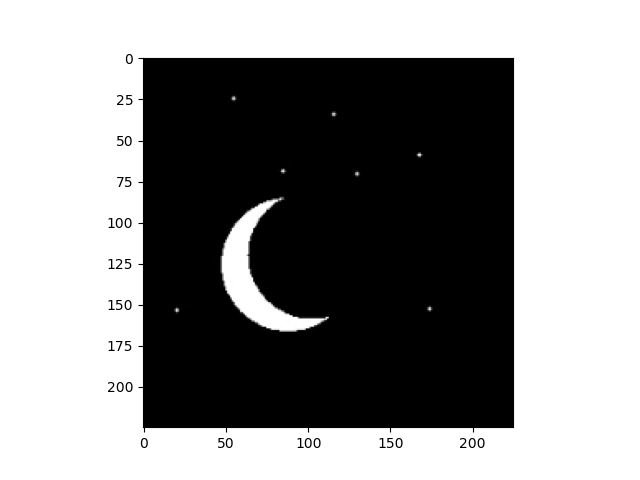

In [125]:
img = cv2.resize(cv2.imread('stars.jpg', 0), (225,225))
plt.imshow(img, cmap='gray')
plt.show()

In [127]:
img.shape

(225, 225)

Get the color of the objects

In [152]:
print("colour of the moon:", img[125,60])
print("colour of the sky:",img[24,174])
print("colour of the stars:",img[25,55])


colour of the moon: 255
colour of the sky: 0
colour of the stars: 214


Define some filter that selects objects not just by its colour, but by its spatial relation.

In [153]:
filter = np.array([[-.1, -.1, -.1, -.1, -.1],
                   [-.1, -.1,  .2, -.1, -.1],
                   [-.1,  .2,  .2 , .2, -.1],
                   [-.1, -.1,  .2, -.1, -.1 ],
                   [-.1, -.1, -.1, -.1, -.1]])

Convolution operation just multiplies the kernel with a slice of the image.

In [154]:
def convolution(img_slice, kernel):
    conv_img = 0
    conv_img = np.multiply(img_slice, kernel)
    conv_img = np.sum(conv_img)
    return conv_img

In [155]:
%%time

convoled_img = np.zeros(shape = (221, 221))
for i in range(img.shape[0]-4):
    for j in range(img.shape[1]-4):
        img_slice = img[i:i+5,j:j+5]
        convoled_img[i,j] = convolution(img_slice, filter)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 2.27 s


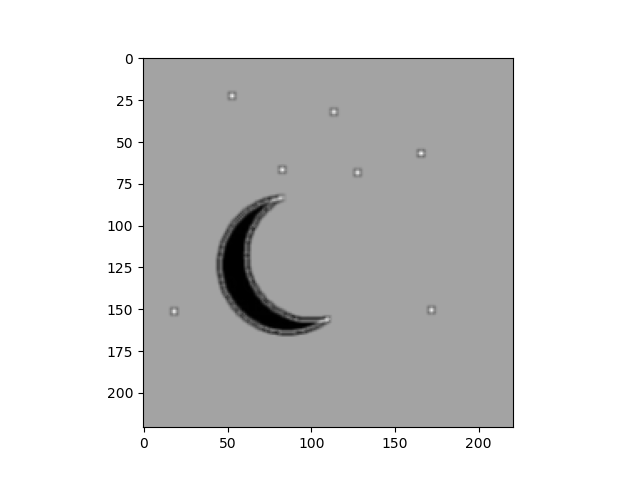

In [156]:
#img_slice = img[i:i+3,j:j+3]
plt.imshow(convoled_img, cmap = 'gray')
plt.show()

## Voluntary Task: Understand a way to Compute the Convolution faster

Previous computation took a while for a single convolution. In a CNN we need multiple convolutions. Next, we show a way how to speed computation up.

In [157]:
%%time

f = np.fft.fftn(img)
f2 = np.pad(filter,(110,110))
f21 = np.fft.fftn(f2)
aaa = f * f21
fft = np.fft.ifftn(aaa)

zeros = np.zeros((225,225))
zeros[1:113,1:113] = fft.real[113:,113:]
zeros[1:113,113:] = fft.real[113:,1:113]
zeros[113:,1:113] = fft.real[1:113,113:]
zeros[113:,113:] = fft.real[1:113,1:113]

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 15 ms


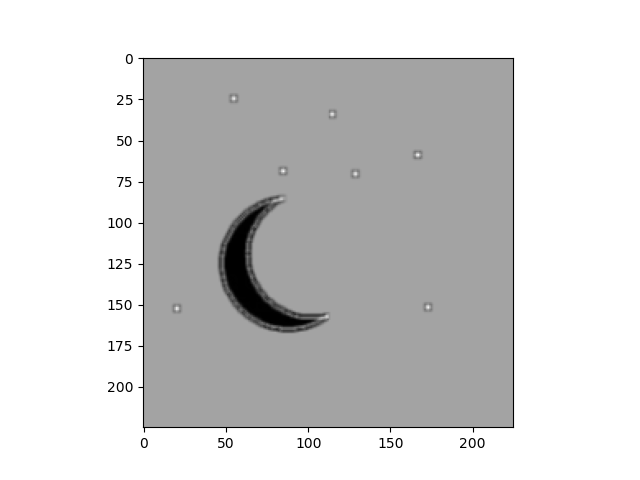

In [158]:
plt.imshow(zeros, cmap='gray')
plt.show()

In [35]:
fft.shape

(225, 225)

In [36]:
convoled_img.shape

(223, 223)